In [1]:
import scipy.io
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

## Load functions

### Gaussian kernel 
K($x^{*}, x_{i}$) = exp(-$\frac{(x^{*}-x_{i})^{2}}{2b^{2}}$)

In [2]:
def gaussianfilter(timeseries, time, b):
# Apply Gaussian kernel -  K($x^{*}, x_{i}$) = exp(-$\frac{(x^{*}-x_{i})^{2}}{2b^{2}}$)
    timeseries_smoothed = []
    for count, t in enumerate(time):
        gkv = np.exp(
        -(((time[:] - time[count])) ** 2) / (2 * (b ** 2))
        )
        gkv /= gkv.sum() #gkv = gkv / gkv.sum()
        timeseries_smoothed.append((timeseries * gkv).sum()) #smoothed_cases.append(round(npl['new_cases'] * npl['gkv']).sum())
    timeseries_smoothed = np.array(timeseries_smoothed)
    return timeseries_smoothed

In [3]:
def skipper(fname, header=False):
    with open(fname) as fin:
        no_comments = (line for line in fin if not line.lstrip().startswith('#'))
        if header:
            next(no_comments, None) # skip header
        for row in no_comments:
            yield row

## Load Climate Model Results

In [4]:
LossPlatIndicies = scipy.io.loadmat('LossPlatEASMIndicies.mat')

## Load Fedorov et al., 2015 gradient estimates

In [5]:
FedorovEtAl2015 = scipy.io.loadmat('FedorovEtAl2015.mat')

In [6]:
FedorovEtAl2015_Ma=FedorovEtAl2015['time'][0,:]/1000
#FedorovEtAl2015_Ma=FedorovEtAl2015_Ma.astype('float64')

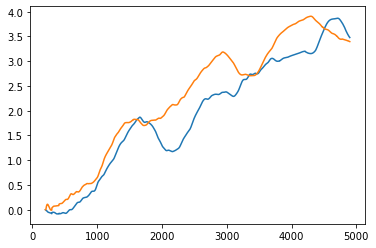

In [7]:
plt.plot(FedorovEtAl2015['time'][0,:],FedorovEtAl2015['gradient_mer_change'][0,:])
plt.plot(FedorovEtAl2015['time'][0,:],FedorovEtAl2015['gradient_zon_change'][0,:])

## Load Tierney et al., 2019 temperature reconstruction

In [8]:
# From Tierney, Jessica E; Haywood, Alan M; Feng, Ran; Bhattacharya, Tripti; Otto-Bliesner, Bette L (2019): Pliocene SSTs and alkenone saturation indices. PANGAEA, https://doi.org/10.1594/PANGAEA.904916, Supplement to: Tierney, JE et al. (2019): Pliocene Warmth Consistent With Greenhouse Gas Forcing. Geophysical Research Letters, 46(15), 9136-9144, https://doi.org/10.1029/2019GL083802
# Downloaded from https://doi.pangaea.de/10.1594/PANGAEA.904916
Tierney2019_midlats = np.loadtxt(skipper('Tierney2019_midlats.csv','TRUE'), delimiter=',')
Tierney2019_tropics = np.loadtxt(skipper('Tierney2019_tropics.csv','TRUE'), delimiter=',')
Tierney2019_east_pac = np.loadtxt(skipper('Tierney2019_east_pac.csv','TRUE'), delimiter=',')
Tierney2019_west_pac = np.loadtxt(skipper('Tierney2019_west_pac.csv','TRUE'), delimiter=',')

In [9]:
Tierney2019_time=Tierney2019_midlats[:,0]/1000

Tierney2019_west_pac=Tierney2019_west_pac[:,1:-1]
Tierney2019_west_pac_em=np.mean(Tierney2019_west_pac[:,:],axis=1) #ensemble mean

Tierney2019_east_pac=Tierney2019_east_pac[:,1:-1]
Tierney2019_east_pac_em=np.mean(Tierney2019_east_pac[:,:],axis=1) #ensemble mean

Tierney2019_tropics=Tierney2019_tropics[:,1:-1]
Tierney2019_tropics_em=np.mean(Tierney2019_tropics[:,:],axis=1) #ensemble mean

Tierney2019_midlats=Tierney2019_midlats[:,1:-1]
Tierney2019_midlats_em=np.mean(Tierney2019_midlats[:,:],axis=1) #ensemble mean

<Figure size 400x400 with 0 Axes>

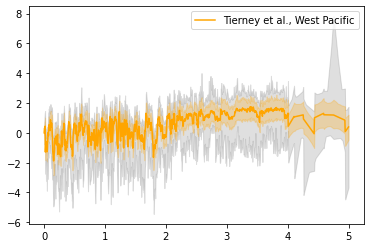

In [10]:
fig = plt.figure(figsize=(4, 4), dpi=100) #figsize(weight,height)
fig,ax=plt.subplots()
line1 = ax.fill_between(Tierney2019_time,np.amin(Tierney2019_west_pac[:,:], axis=1),
                np.amax(Tierney2019_west_pac[:,:], axis=1), color='grey', alpha=0.25)
line2 = ax.fill_between(Tierney2019_time,np.percentile(Tierney2019_west_pac[:,:], 2.5, axis=1),
                np.percentile(Tierney2019_west_pac[:,:], 97.5, axis=1), color='orange', alpha=0.25)
line3 = plt.plot(Tierney2019_time,Tierney2019_west_pac_em, color='orange', label='Tierney et al., West Pacific')
ax.legend()

<Figure size 400x400 with 0 Axes>

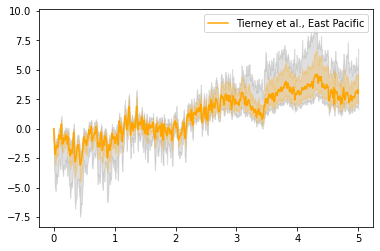

In [11]:
fig = plt.figure(figsize=(4, 4), dpi=100) #figsize(weight,height)
fig,ax=plt.subplots()
line1 = ax.fill_between(Tierney2019_time,np.amin(Tierney2019_east_pac[:,:], axis=1),
                np.amax(Tierney2019_east_pac[:,:], axis=1), color='grey', alpha=0.25)
line2 = ax.fill_between(Tierney2019_time,np.percentile(Tierney2019_east_pac[:,:], 2.5, axis=1),
                np.percentile(Tierney2019_east_pac[:,:], 97.5, axis=1), color='orange', alpha=0.25)
line3 = plt.plot(Tierney2019_time,Tierney2019_east_pac_em, color='orange', label='Tierney et al., East Pacific')
ax.legend()

<Figure size 400x400 with 0 Axes>

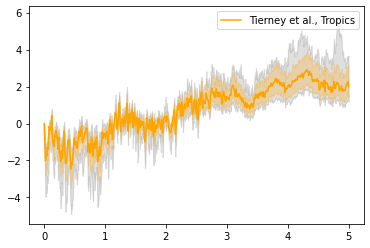

In [12]:
fig = plt.figure(figsize=(4, 4), dpi=100) #figsize(weight,height)
fig,ax=plt.subplots()
line1 = ax.fill_between(Tierney2019_time,np.amin(Tierney2019_tropics[:,:], axis=1),
                np.amax(Tierney2019_tropics[:,:], axis=1), color='grey', alpha=0.25)
line2 = ax.fill_between(Tierney2019_time,np.percentile(Tierney2019_tropics[:,:], 2.5, axis=1),
                np.percentile(Tierney2019_tropics[:,:], 97.5, axis=1), color='orange', alpha=0.25)
line3 = plt.plot(Tierney2019_time,Tierney2019_tropics_em, color='orange', label='Tierney et al., Tropics')
ax.legend()

<Figure size 400x400 with 0 Axes>

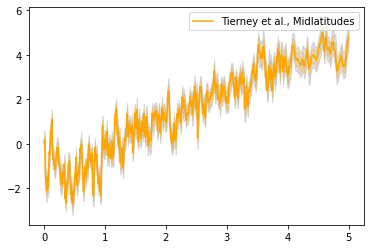

In [13]:
fig = plt.figure(figsize=(4, 4), dpi=100) #figsize(weight,height)
fig,ax=plt.subplots()
line1 = ax.fill_between(Tierney2019_time,np.amin(Tierney2019_midlats[:,:], axis=1),
                np.amax(Tierney2019_midlats[:,:], axis=1), color='grey', alpha=0.25)
line2 = ax.fill_between(Tierney2019_time,np.percentile(Tierney2019_midlats[:,:], 2.5, axis=1),
                np.percentile(Tierney2019_midlats[:,:], 97.5, axis=1), color='orange', alpha=0.25)
line3 = plt.plot(Tierney2019_time,Tierney2019_midlats_em, color='orange', label='Tierney et al., Midlatitudes')
ax.legend()

In [14]:
Tierney_Time_diff=Tierney2019_midlats[:,0]-Tierney2019_east_pac[:,0]

In [15]:
Tierney2019_time_delta=Tierney2019_midlats[1:-1,0]-Tierney2019_midlats[0:-2,0]

### Apply Gaussian kernel 
K($x^{*}, x_{i}$) = exp(-$\frac{(x^{*}-x_{i})^{2}}{2b^{2}}$)

In [16]:
Tierney2019_midlats_em_smoothed=gaussianfilter(Tierney2019_midlats_em, Tierney2019_time[:], 0.2)

In [17]:
[nt,ne]=Tierney2019_midlats.shape
Tierney2019_midlats_smoothed=np.zeros([nt,ne])
for i in range(ne):
    Tierney2019_midlats_smoothed[:,i]=gaussianfilter(Tierney2019_midlats[:,i], Tierney2019_time[:], 0.2)

<Figure size 400x400 with 0 Axes>

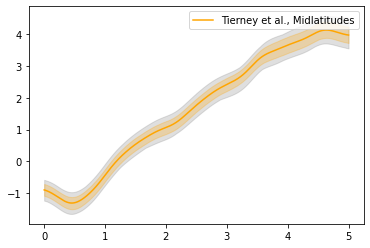

In [18]:
fig = plt.figure(figsize=(4, 4), dpi=100) #figsize(weight,height)
fig,ax=plt.subplots()
line1 = ax.fill_between(Tierney2019_time,np.amin(Tierney2019_midlats_smoothed[:,:], axis=1),
                np.amax(Tierney2019_midlats_smoothed[:,:], axis=1), color='grey', alpha=0.25)
line2 = ax.fill_between(Tierney2019_time,np.percentile(Tierney2019_midlats_smoothed[:,:], 2.5, axis=1),
                np.percentile(Tierney2019_midlats_smoothed[:,:], 97.5, axis=1), color='orange', alpha=0.25)
line3 = plt.plot(Tierney2019_time,Tierney2019_midlats_em_smoothed, color='orange', label='Tierney et al., Midlatitudes')
ax.legend()

In [19]:
Tierney2019_tropics_em_smoothed=gaussianfilter(Tierney2019_tropics_em, Tierney2019_time[:], 0.2)

In [20]:
[nt,ne]=Tierney2019_tropics.shape
Tierney2019_tropics_smoothed=np.zeros([nt,ne])
for i in range(ne):
    Tierney2019_tropics_smoothed[:,i]=gaussianfilter(Tierney2019_tropics[:,i], Tierney2019_time[:], 0.2)

<Figure size 400x400 with 0 Axes>

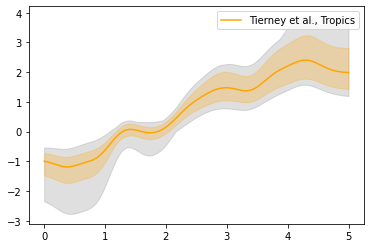

In [21]:
fig = plt.figure(figsize=(4, 4), dpi=100) #figsize(weight,height)
fig,ax=plt.subplots()
line1 = ax.fill_between(Tierney2019_time,np.amin(Tierney2019_tropics_smoothed[:,:], axis=1),
                np.amax(Tierney2019_tropics_smoothed[:,:], axis=1), color='grey', alpha=0.25)
line2 = ax.fill_between(Tierney2019_time,np.percentile(Tierney2019_tropics_smoothed[:,:], 2.5, axis=1),
                np.percentile(Tierney2019_tropics_smoothed[:,:], 97.5, axis=1), color='orange', alpha=0.25)
line3 = plt.plot(Tierney2019_time,Tierney2019_tropics_em_smoothed, color='orange', label='Tierney et al., Tropics')
ax.legend()

In [22]:
Tierney2019_east_pac_em_smoothed=gaussianfilter(Tierney2019_east_pac_em, Tierney2019_time[:], 0.2)

In [23]:
[nt,ne]=Tierney2019_east_pac.shape
Tierney2019_east_pac_smoothed=np.zeros([nt,ne])
for i in range(ne):
    Tierney2019_east_pac_smoothed[:,i]=gaussianfilter(Tierney2019_east_pac[:,i], Tierney2019_time[:], 0.2)

<Figure size 400x400 with 0 Axes>

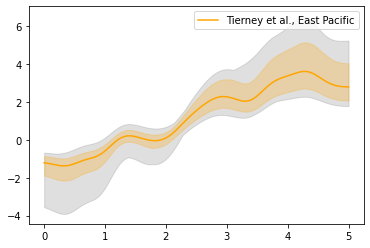

In [24]:
fig = plt.figure(figsize=(4, 4), dpi=100) #figsize(weight,height)
fig,ax=plt.subplots()
line1 = ax.fill_between(Tierney2019_time,np.amin(Tierney2019_east_pac_smoothed[:,:], axis=1),
                np.amax(Tierney2019_east_pac_smoothed[:,:], axis=1), color='grey', alpha=0.25)
line2 = ax.fill_between(Tierney2019_time,np.percentile(Tierney2019_east_pac_smoothed[:,:], 2.5, axis=1),
                np.percentile(Tierney2019_east_pac_smoothed[:,:], 97.5, axis=1), color='orange', alpha=0.25)
line3 = plt.plot(Tierney2019_time,Tierney2019_east_pac_em_smoothed, color='orange', label='Tierney et al., East Pacific')
ax.legend()

In [25]:
Tierney2019_west_pac_em_smoothed=gaussianfilter(Tierney2019_west_pac_em, Tierney2019_time[:], 0.2)

In [26]:
[nt,ne]=Tierney2019_west_pac.shape
Tierney2019_west_pac_smoothed=np.zeros([nt,ne])
for i in range(ne):
    Tierney2019_west_pac_smoothed[:,i]=gaussianfilter(Tierney2019_west_pac[:,i], Tierney2019_time[:], 0.2)

<Figure size 400x400 with 0 Axes>

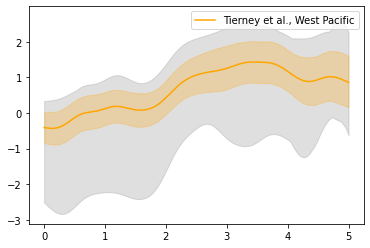

In [27]:
fig = plt.figure(figsize=(4, 4), dpi=100) #figsize(weight,height)
fig,ax=plt.subplots()
line1 = ax.fill_between(Tierney2019_time,np.amin(Tierney2019_west_pac_smoothed[:,:], axis=1),
                np.amax(Tierney2019_west_pac_smoothed[:,:], axis=1), color='grey', alpha=0.25)
line2 = ax.fill_between(Tierney2019_time,np.percentile(Tierney2019_west_pac_smoothed[:,:], 2.5, axis=1),
                np.percentile(Tierney2019_west_pac_smoothed[:,:], 97.5, axis=1), color='orange', alpha=0.25)
line3 = plt.plot(Tierney2019_time,Tierney2019_west_pac_em_smoothed, color='orange', label='Tierney et al., West Pacific')
ax.legend()

In [28]:
Tierney2019_gradient_mer_change=Tierney2019_tropics[:,1:-1]-Tierney2019_midlats[:,1:-1]
Tierney2019_gradient_mer_change_em=np.mean(Tierney2019_gradient_mer_change[:,:],axis=1)

Tierney2019_gradient_zon_change=Tierney2019_west_pac[:,1:-1]-Tierney2019_east_pac[:,1:-1]
Tierney2019_gradient_zon_change_em=np.mean(Tierney2019_gradient_zon_change[:,:],axis=1)

In [29]:
Tierney2019_gradient_mer_change_smoothed=Tierney2019_tropics_smoothed[:,1:-1]-Tierney2019_midlats_smoothed[:,1:-1]
Tierney2019_gradient_mer_change_em_smoothed=np.mean(Tierney2019_gradient_mer_change_smoothed[:,:],axis=1)

Tierney2019_gradient_zon_change_smoothed=Tierney2019_west_pac_smoothed[:,1:-1]-Tierney2019_east_pac_smoothed[:,1:-1]
Tierney2019_gradient_zon_change_em_smoothed=np.mean(Tierney2019_gradient_zon_change_smoothed[:,:],axis=1)

<Figure size 400x400 with 0 Axes>

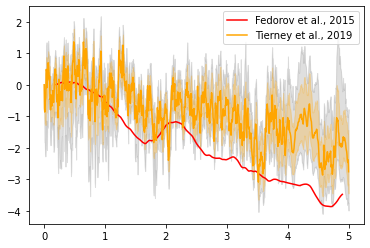

In [30]:
fig = plt.figure(figsize=(4, 4), dpi=100) #figsize(weight,height)
fig,ax=plt.subplots()
line1 = plt.plot(FedorovEtAl2015_Ma,-FedorovEtAl2015['gradient_mer_change'][0,:], color='red', label='Fedorov et al., 2015')
line2 = ax.fill_between(Tierney2019_time,np.amin(Tierney2019_gradient_mer_change[:,:], axis=1),
                np.amax(Tierney2019_gradient_mer_change[:,:], axis=1), color='grey', alpha=0.25)
line3 = ax.fill_between(Tierney2019_time,np.percentile(Tierney2019_gradient_mer_change[:,:], 2.5, axis=1),
                np.percentile(Tierney2019_gradient_mer_change[:,:], 97.5, axis=1), color='orange', alpha=0.25)
line4 = plt.plot(Tierney2019_time,Tierney2019_gradient_mer_change_em, color='orange', label='Tierney et al., 2019')
ax.legend()

<Figure size 400x400 with 0 Axes>

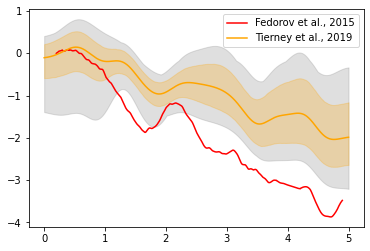

In [31]:
fig = plt.figure(figsize=(4, 4), dpi=100) #figsize(weight,height)
fig,ax=plt.subplots()
line1 = plt.plot(FedorovEtAl2015_Ma,-FedorovEtAl2015['gradient_mer_change'][0,:], color='red', label='Fedorov et al., 2015')
line2 = ax.fill_between(Tierney2019_time,np.amin(Tierney2019_gradient_mer_change_smoothed[:,:], axis=1),
                np.amax(Tierney2019_gradient_mer_change_smoothed[:,:], axis=1), color='grey', alpha=0.25)
line3 = ax.fill_between(Tierney2019_time,np.percentile(Tierney2019_gradient_mer_change_smoothed[:,:], 2.5, axis=1),
                np.percentile(Tierney2019_gradient_mer_change_smoothed[:,:], 97.5, axis=1), color='orange', alpha=0.25)
line4 = plt.plot(Tierney2019_time,Tierney2019_gradient_mer_change_em_smoothed, color='orange', label='Tierney et al., 2019')
ax.legend()

<Figure size 400x400 with 0 Axes>

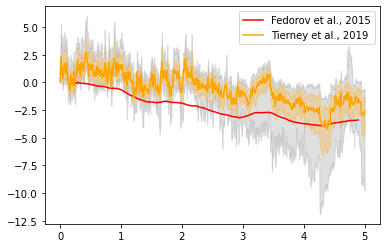

In [32]:
fig = plt.figure(figsize=(4, 4), dpi=100) #figsize(weight,height)
fig,ax=plt.subplots()
line1 = plt.plot(FedorovEtAl2015_Ma,-FedorovEtAl2015['gradient_zon_change'][0,:], color='red', label='Fedorov et al., 2015')
line2 = ax.fill_between(Tierney2019_time,np.amin(Tierney2019_gradient_zon_change[:,:], axis=1),
                np.amax(Tierney2019_gradient_zon_change[:,:], axis=1), color='grey', alpha=0.25)
line3 = ax.fill_between(Tierney2019_time,np.percentile(Tierney2019_gradient_zon_change[:,:], 2.5, axis=1),
                np.percentile(Tierney2019_gradient_zon_change[:,:], 97.5, axis=1), color='orange', alpha=0.25)
line4 = plt.plot(Tierney2019_time,Tierney2019_gradient_zon_change_em, color='orange', label='Tierney et al., 2019')
ax.legend()

<Figure size 400x400 with 0 Axes>

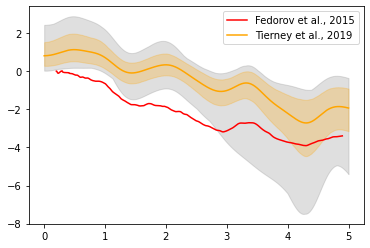

In [33]:
fig = plt.figure(figsize=(4, 4), dpi=100) #figsize(weight,height)
fig,ax=plt.subplots()
line1 = plt.plot(FedorovEtAl2015_Ma,-FedorovEtAl2015['gradient_zon_change'][0,:], color='red', label='Fedorov et al., 2015')
line2 = ax.fill_between(Tierney2019_time,np.amin(Tierney2019_gradient_zon_change_smoothed[:,:], axis=1),
                np.amax(Tierney2019_gradient_zon_change_smoothed[:,:], axis=1), color='grey', alpha=0.25)
line3 = ax.fill_between(Tierney2019_time,np.percentile(Tierney2019_gradient_zon_change_smoothed[:,:], 2.5, axis=1),
                np.percentile(Tierney2019_gradient_zon_change_smoothed[:,:], 97.5, axis=1), color='orange', alpha=0.25)
line4 = plt.plot(Tierney2019_time,Tierney2019_gradient_zon_change_em_smoothed, color='orange', label='Tierney et al., 2019')
ax.legend()

## Load Hansen et al. (2013) global mean temperature reconstruction

In [34]:
# From Hansen et al., (2013) https://doi.org/10.1098/rsta.2012.0294
# Downloaded from https://github.com/jesstierney/PastClimates
THansenMethodGST = np.loadtxt(skipper('THansenMethod.csv','TRUE'), delimiter=',')

Tuple of arrays returned :  (array([   0,    1,    2, ..., 4842, 4843, 4844]),)
The last element with value <= 5Ma exists at following indice
4844


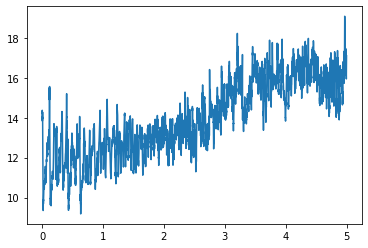

In [35]:
# extract the last 5Ma
result = np.where(THansenMethodGST[:,0]<=5)
index=result[0]
print('Tuple of arrays returned : ', result)
print("The last element with value <= 5Ma exists at following indice", index[-1], sep='\n')
THansenMethodGST_5Ma=THansenMethodGST[0:index[-1],:]
plt.plot(THansenMethodGST_5Ma[:,0],THansenMethodGST_5Ma[:,1])

In [36]:
Hansen_time_Ma=THansenMethodGST_5Ma[:,0]
delta_HansenGST=THansenMethodGST_5Ma[:,1]-14 # Change relative to PreInd 14 Celsius

## Interpolate Hansen et al. (2013) to Fedorov et al. (2015) time

In [37]:
from scipy import interpolate
f = interpolate.interp1d(Hansen_time_Ma, delta_HansenGST, axis=0)

In [38]:
delta_HansenGST_Fedtime=f(FedorovEtAl2015_Ma)

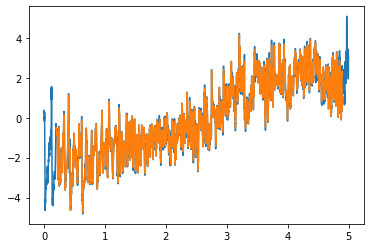

In [39]:
plt.plot(Hansen_time_Ma, delta_HansenGST)
plt.plot(FedorovEtAl2015_Ma,delta_HansenGST_Fedtime)

### Apply Gaussian kernel 
K($x^{*}, x_{i}$) = exp(-$\frac{(x^{*}-x_{i})^{2}}{2b^{2}}$)

In [40]:
delta_HansenGST_Fedtime_smoothed=gaussianfilter(delta_HansenGST_Fedtime,FedorovEtAl2015_Ma, 0.2)

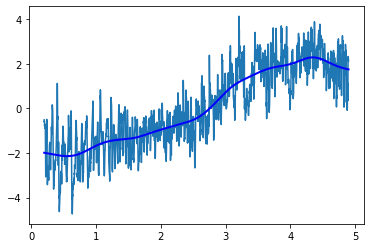

In [41]:
plt.plot(FedorovEtAl2015_Ma,delta_HansenGST_Fedtime)
plt.plot(FedorovEtAl2015_Ma,delta_HansenGST_Fedtime_smoothed,'b',linewidth=2.0)

## Create Synthetic Records

In [42]:
from scipy.stats import linregress

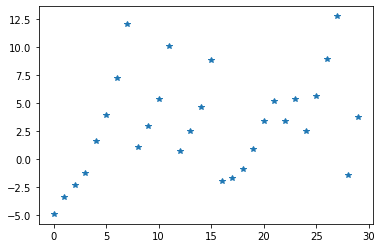

In [43]:
plt.plot(np.concatenate((LossPlatIndicies['delta_GTS'][0,1:21],LossPlatIndicies['delta_GTS'][0,22:]),axis=0),'*')

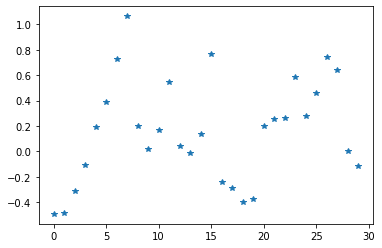

In [44]:
plt.plot(np.concatenate((LossPlatIndicies['delta_P_LossPlatEASM'][0,1:21],LossPlatIndicies['delta_P_LossPlatEASM'][0,22:]),axis=0),'*')

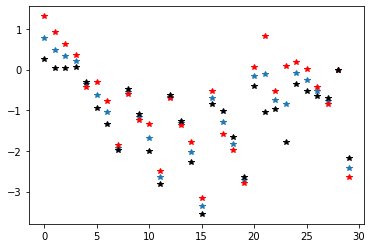

In [45]:
plt.plot(np.concatenate((LossPlatIndicies['delta_SST_struct'][0,1:21],LossPlatIndicies['delta_SST_struct'][0,22:]),axis=0),'*')
plt.plot(np.concatenate((LossPlatIndicies['delta_SST_struct_NH'][0,1:21],LossPlatIndicies['delta_SST_struct_NH'][0,22:]),axis=0),'*',color='red')
plt.plot(np.concatenate((LossPlatIndicies['delta_SST_struct_SH'][0,1:21],LossPlatIndicies['delta_SST_struct_SH'][0,22:]),axis=0),'*',color='black')

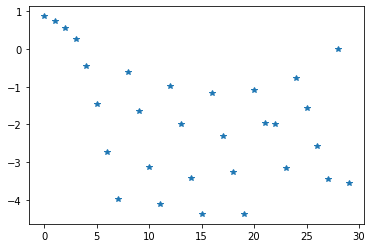

In [46]:
plt.plot(np.concatenate((LossPlatIndicies['delta_Pac_zonal_grad_SST'][0,1:21],LossPlatIndicies['delta_Pac_zonal_grad_SST'][0,22:]),axis=0),'*')

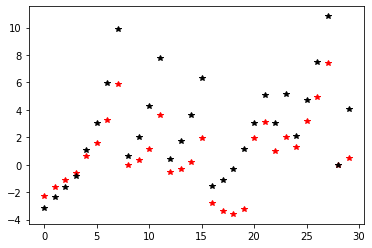

In [47]:
plt.plot(np.concatenate((LossPlatIndicies['delta_Pac_west_SST_3NS_140_160E'][0,1:21],LossPlatIndicies['delta_Pac_west_SST_3NS_140_160E'][0,22:]),axis=0),'*',color='red')
plt.plot(np.concatenate((LossPlatIndicies['delta_Pac_east_SST_3NS_240_280E'][0,1:21],LossPlatIndicies['delta_Pac_east_SST_3NS_240_280E'][0,22:]),axis=0),'*',color='black')

## Relationship between Meridional and Zonal Gradients

In [48]:
x=np.concatenate((LossPlatIndicies['delta_SST_struct'][0,1:21],LossPlatIndicies['delta_SST_struct'][0,22:]),axis=0)
y=np.concatenate((LossPlatIndicies['delta_Pac_zonal_grad_SST'][0,1:21],LossPlatIndicies['delta_Pac_zonal_grad_SST'][0,22:]),axis=0)

In [49]:
slope, intercept, r_value, p_value, std_err = linregress(x, y)

In [50]:
slope,intercept,r_value,p_value, std_err

(1.3798722106500905,
 -0.636779222269213,
 0.8950332326595197,
 2.5146530088844948e-11,
 0.1299436370403612)

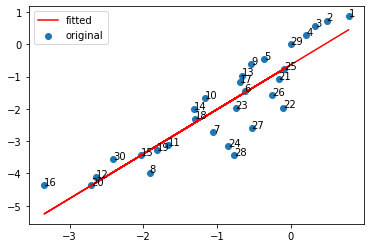

In [51]:
fig, ax = plt.subplots()
plt.scatter(x, y)
plt.plot(x, intercept + slope*x, 'r')
plt.legend(['fitted','original'])

for i, txt in enumerate(x):
     ax.annotate(i+1, (x[i], y[i])) #ax.annotate(LossPlatIndicies['RUN_NAME'][0,i], (x[i], y[i]))

In [52]:
x=np.concatenate((LossPlatIndicies['delta_SST_struct_NH'][0,1:21],LossPlatIndicies['delta_SST_struct_NH'][0,22:]),axis=0)
y=np.concatenate((LossPlatIndicies['delta_Pac_zonal_grad_SST'][0,1:21],LossPlatIndicies['delta_Pac_zonal_grad_SST'][0,22:]),axis=0)

In [53]:
slope, intercept, r_value, p_value, std_err = linregress(x, y)

In [54]:
slope,intercept,r_value,p_value, std_err

(1.1334182919015914,
 -1.0553771821749907,
 0.8322526638232282,
 1.1884639507549766e-08,
 0.1426844037610939)

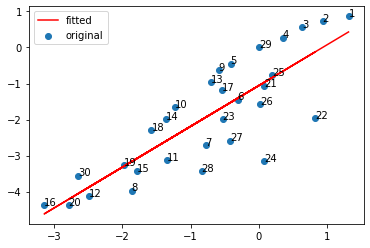

In [55]:
fig, ax = plt.subplots()
plt.scatter(x, y)
plt.plot(x, intercept + slope*x, 'r')
plt.legend(['fitted','original'])

for i, txt in enumerate(x):
     ax.annotate(i+1, (x[i], y[i])) #ax.annotate(LossPlatIndicies['RUN_NAME'][0,i], (x[i], y[i]))

In [56]:
x=np.concatenate((LossPlatIndicies['delta_SST_struct_NH'][0,1:21],LossPlatIndicies['delta_SST_struct_NH'][0,22:]),axis=0)
y=np.concatenate((LossPlatIndicies['delta_Pac_meridional_grad_SST_NH'][0,1:21],LossPlatIndicies['delta_Pac_meridional_grad_SST_NH'][0,22:]),axis=0)

In [57]:
slope, intercept, r_value, p_value, std_err = linregress(x, y)

In [58]:
slope,intercept,r_value,p_value, std_err

(1.7515224374070755,
 -0.3314128367414122,
 0.9883503330227827,
 1.9342852056709886e-24,
 0.050971684346054535)

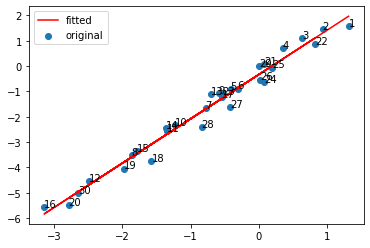

In [59]:
fig, ax = plt.subplots()
plt.scatter(x, y)
plt.plot(x, intercept + slope*x, 'r')
plt.legend(['fitted','original'])

for i, txt in enumerate(x):
     ax.annotate(i+1, (x[i], y[i])) #ax.annotate(LossPlatIndicies['RUN_NAME'][0,i], (x[i], y[i]))

In [60]:
x=np.concatenate((LossPlatIndicies['delta_SST_struct_NH'][0,1:21],LossPlatIndicies['delta_SST_struct_NH'][0,22:]),axis=0)
y=np.concatenate((LossPlatIndicies['delta_Pac_meridional_grad_SST'][0,1:21],LossPlatIndicies['delta_Pac_meridional_grad_SST'][0,22:]),axis=0)

In [61]:
slope, intercept, r_value, p_value, std_err = linregress(x, y)

In [62]:
slope,intercept,r_value,p_value, std_err

(1.2967623896721903,
 -0.5628315835224881,
 0.9663791153135312,
 4.700963605519669e-18,
 0.0652036713449062)

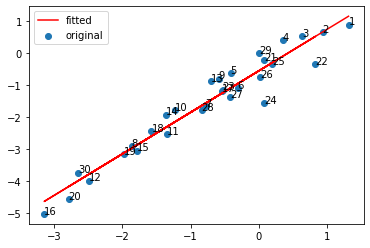

In [63]:
fig, ax = plt.subplots()
plt.scatter(x, y)
plt.plot(x, intercept + slope*x, 'r')
plt.legend(['fitted','original'])

for i, txt in enumerate(x):
     ax.annotate(i+1, (x[i], y[i])) #ax.annotate(LossPlatIndicies['RUN_NAME'][0,i], (x[i], y[i]))

## Loss Plateau Precip

Exclude runs that are too warm or cool. Runs: 2, 3, 9, 13, 17, 29, 30 -> 1, 2, 8, 12, 16, 28, 29

In [64]:
RUN_NAME_withExcluded=np.concatenate((LossPlatIndicies['RUN_NAME'][:,0],LossPlatIndicies['RUN_NAME'][0,3:8],LossPlatIndicies['RUN_NAME'][0,9:12],LossPlatIndicies['RUN_NAME'][0,13:16],LossPlatIndicies['RUN_NAME'][0,17:21],LossPlatIndicies['RUN_NAME'][0,21:28],LossPlatIndicies['RUN_NAME'][0,30:]),axis=0)

### Zonal Temperature Gradient

In [65]:
#Dont Exclude runs
#x=LossPlatIndicies['delta_Pac_zonal_grad_SST'][0,:]
#y=LossPlatIndicies['delta_P_LossPlatEASM'][0,:]

# Exclude Controls
#x=np.concatenate((LossPlatIndicies['delta_Pac_zonal_grad_SST'][0,1:21],LossPlatIndicies['delta_Pac_zonal_grad_SST'][0,22:]),axis=0)
#y=np.concatenate((LossPlatIndicies['delta_P_LossPlatEASM'][0,1:21],LossPlatIndicies['delta_P_LossPlatEASM'][0,22:]),axis=0)

#Exclude runs and controls
#x=np.concatenate((LossPlatIndicies['delta_Pac_zonal_grad_SST'][0,3:8],LossPlatIndicies['delta_Pac_zonal_grad_SST'][0,9:12],LossPlatIndicies['delta_Pac_zonal_grad_SST'][0,13:16],LossPlatIndicies['delta_Pac_zonal_grad_SST'][0,17:21],LossPlatIndicies['delta_Pac_zonal_grad_SST'][0,22:28],LossPlatIndicies['delta_Pac_zonal_grad_SST'][0,30:]),axis=0)
#y=np.concatenate((LossPlatIndicies['delta_P_LossPlatEASM'][0,3:8],LossPlatIndicies['delta_P_LossPlatEASM'][0,9:12],LossPlatIndicies['delta_P_LossPlatEASM'][0,13:16],LossPlatIndicies['delta_P_LossPlatEASM'][0,17:21],LossPlatIndicies['delta_P_LossPlatEASM'][0,22:28],LossPlatIndicies['delta_P_LossPlatEASM'][0,30:]),axis=0)

#Exclude runs
x=np.concatenate((LossPlatIndicies['delta_Pac_zonal_grad_SST'][:,0],LossPlatIndicies['delta_Pac_zonal_grad_SST'][0,3:8],LossPlatIndicies['delta_Pac_zonal_grad_SST'][0,9:12],LossPlatIndicies['delta_Pac_zonal_grad_SST'][0,13:16],LossPlatIndicies['delta_Pac_zonal_grad_SST'][0,17:21],LossPlatIndicies['delta_Pac_zonal_grad_SST'][0,21:28],LossPlatIndicies['delta_Pac_zonal_grad_SST'][0,30:]),axis=0)
y=np.concatenate((LossPlatIndicies['delta_P_LossPlatEASM'][:,0],LossPlatIndicies['delta_P_LossPlatEASM'][0,3:8],LossPlatIndicies['delta_P_LossPlatEASM'][0,9:12],LossPlatIndicies['delta_P_LossPlatEASM'][0,13:16],LossPlatIndicies['delta_P_LossPlatEASM'][0,17:21],LossPlatIndicies['delta_P_LossPlatEASM'][0,21:28],LossPlatIndicies['delta_P_LossPlatEASM'][0,30:]),axis=0)



In [66]:
slope_SWP_Zonal, intercept_SWP_Zonal, r_value_SWP_Zonal, p_value_SWP_Zonal, std_err_SWP_Zonal = linregress(x, y)

In [67]:
slope_SWP_Zonal,intercept_SWP_Zonal,r_value_SWP_Zonal,p_value_SWP_Zonal, std_err_SWP_Zonal

(-0.008196675694007765,
 0.06953848285494475,
 -0.038523409415399563,
 0.8549367295554073,
 0.04433294893853812)

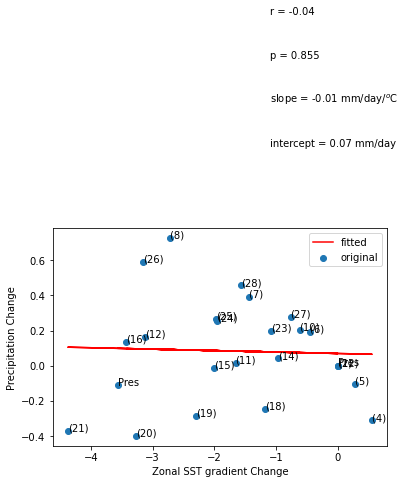

In [68]:
fig, ax = plt.subplots()
plt.scatter(x, y)
plt.plot(x, intercept_SWP_Zonal + slope_SWP_Zonal*x, 'r')
plt.legend(['fitted','original'])

for i, txt in enumerate(x):
     ax.annotate(RUN_NAME_withExcluded[i][0][0:4], (x[i], y[i]))
        
ax.text(-1.1, 2, 'r = '+ str(round(r_value_SWP_Zonal,2)), fontsize=10)
ax.text(-1.1, 1.75, 'p = '+ str(round(p_value_SWP_Zonal,3)), fontsize=10)
ax.text(-1.1, 1.5, 'slope = '+ str(round(slope_SWP_Zonal,2))+' mm/day/$^{o}$C', fontsize=10)
ax.text(-1.1, 1.25, 'intercept = '+ str(round(intercept_SWP_Zonal,2))+' mm/day', fontsize=10)

ax.set_xlabel('Zonal SST gradient Change')
ax.set_ylabel('Precipitation Change')

plt.savefig('LossPlateauPrecip_vs_Zonal.pdf', format='pdf')
plt.savefig('LossPlateauPrecip_vs_Zonal.png', format='png') 

### Meridional Temperature Gradient

In [69]:
#Dont Exclude runs
#x=LossPlatIndicies['delta_Pac_meridional_grad_SST'][0,:]
#y=LossPlatIndicies['delta_P_LossPlatEASM'][0,:]

# Exclude Controls
#x=np.concatenate((LossPlatIndicies['delta_Pac_meridional_grad_SST'][0,1:21],LossPlatIndicies['delta_Pac_meridional_grad_SST'][0,22:]),axis=0)
#y=np.concatenate((LossPlatIndicies['delta_P_LossPlatEASM'][0,1:21],LossPlatIndicies['delta_P_LossPlatEASM'][0,22:]),axis=0)


#Exclude runs and controls
#x=np.concatenate((LossPlatIndicies['delta_Pac_meridional_grad_SST'][0,3:8],LossPlatIndicies['delta_Pac_meridional_grad_SST'][0,9:12],LossPlatIndicies['delta_Pac_meridional_grad_SST'][0,13:16],LossPlatIndicies['delta_Pac_meridional_grad_SST'][0,17:21],LossPlatIndicies['delta_Pac_meridional_grad_SST'][0,22:28],LossPlatIndicies['delta_Pac_meridional_grad_SST'][0,30:]),axis=0)
#y=np.concatenate((LossPlatIndicies['delta_P_LossPlatEASM'][0,3:8],LossPlatIndicies['delta_P_LossPlatEASM'][0,9:12],LossPlatIndicies['delta_P_LossPlatEASM'][0,13:16],LossPlatIndicies['delta_P_LossPlatEASM'][0,17:21],LossPlatIndicies['delta_P_LossPlatEASM'][0,22:28],LossPlatIndicies['delta_P_LossPlatEASM'][0,30:]),axis=0)

#Exclude runs
#x=np.concatenate((LossPlatIndicies['delta_Pac_meridional_grad_SST'][:,0],LossPlatIndicies['delta_Pac_meridional_grad_SST'][0,3:8],LossPlatIndicies['delta_Pac_meridional_grad_SST'][0,9:12],LossPlatIndicies['delta_Pac_meridional_grad_SST'][0,13:16],LossPlatIndicies['delta_Pac_meridional_grad_SST'][0,17:21],LossPlatIndicies['delta_Pac_meridional_grad_SST'][0,21:28],LossPlatIndicies['delta_Pac_meridional_grad_SST'][0,30:]),axis=0)
x=np.concatenate((LossPlatIndicies['delta_SST_struct'][:,0],LossPlatIndicies['delta_SST_struct'][0,3:8],LossPlatIndicies['delta_SST_struct'][0,9:12],LossPlatIndicies['delta_SST_struct'][0,13:16],LossPlatIndicies['delta_SST_struct'][0,17:21],LossPlatIndicies['delta_SST_struct'][0,21:28],LossPlatIndicies['delta_SST_struct'][0,30:]),axis=0)
#x=np.concatenate((LossPlatIndicies['delta_SST_struct_NH'][:,0],LossPlatIndicies['delta_SST_struct_NH'][0,3:8],LossPlatIndicies['delta_SST_struct_NH'][0,9:12],LossPlatIndicies['delta_SST_struct_NH'][0,13:16],LossPlatIndicies['delta_SST_struct_NH'][0,17:21],LossPlatIndicies['delta_SST_struct_NH'][0,21:28],LossPlatIndicies['delta_SST_struct_NH'][0,30:]),axis=0)
y=np.concatenate((LossPlatIndicies['delta_P_LossPlatEASM'][:,0],LossPlatIndicies['delta_P_LossPlatEASM'][0,3:8],LossPlatIndicies['delta_P_LossPlatEASM'][0,9:12],LossPlatIndicies['delta_P_LossPlatEASM'][0,13:16],LossPlatIndicies['delta_P_LossPlatEASM'][0,17:21],LossPlatIndicies['delta_P_LossPlatEASM'][0,21:28],LossPlatIndicies['delta_P_LossPlatEASM'][0,30:]),axis=0)


In [70]:
slope_SWP_Merid, intercept_SWP_Merid, r_value_SWP_Merid, p_value_SWP_Merid, std_err_SWP_Merid = linregress(x, y)

In [71]:
slope_SWP_Merid,intercept_SWP_Merid,r_value_SWP_Merid,p_value_SWP_Merid, std_err_SWP_Merid

(0.08487625528191894,
 0.15081407831889415,
 0.2437928797364258,
 0.24024219138457967,
 0.07040373332604327)

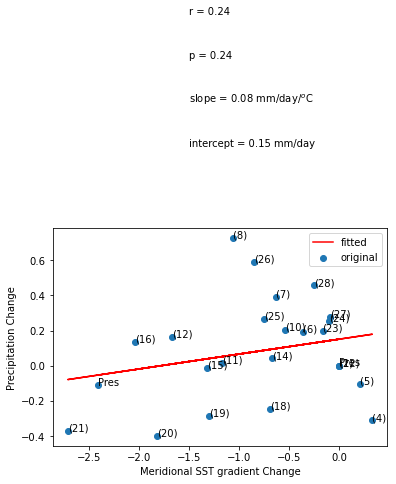

In [72]:
fig, ax = plt.subplots()
plt.scatter(x, y)
plt.plot(x, intercept_SWP_Merid + slope_SWP_Merid*x, 'r')
plt.legend(['fitted','original'])

for i, txt in enumerate(x):
     ax.annotate(RUN_NAME_withExcluded[i][0][0:4], (x[i], y[i]))
        
ax.text(-1.5, 2, 'r = '+ str(round(r_value_SWP_Merid,2)), fontsize=10)
ax.text(-1.5, 1.75, 'p = '+ str(round(p_value_SWP_Merid,3)), fontsize=10)
ax.text(-1.5, 1.5, 'slope = '+ str(round(slope_SWP_Merid,2))+' mm/day/$^{o}$C', fontsize=10)
ax.text(-1.5, 1.25, 'intercept = '+ str(round(intercept_SWP_Merid,2))+' mm/day', fontsize=10)

ax.set_xlabel('Meridional SST gradient Change')
ax.set_ylabel('Precipitation Change')

plt.savefig('LossPlateauPrecip_vs_Meridional.pdf', format='pdf')
plt.savefig('LossPlateauPrecip_vs_Meridional.png', format='png') 

Text(0.5, 1.0, 'Loss Plateau Precipitation Synthetic Time Series')

<Figure size 400x400 with 0 Axes>

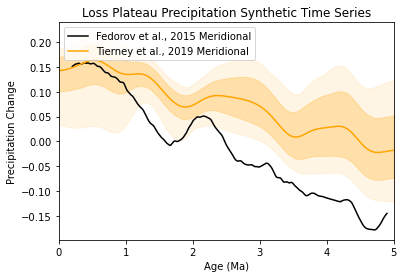

In [73]:
fig = plt.figure(figsize=(4, 4), dpi=100) #figsize(weight,height)
fig,ax=plt.subplots()
line1 = plt.plot(FedorovEtAl2015_Ma,-FedorovEtAl2015['gradient_mer_change'][0,:]*slope_SWP_Merid+intercept_SWP_Merid, color='black', label='Fedorov et al., 2015 Meridional')
line2 = ax.fill_between(Tierney2019_time,np.amin(Tierney2019_gradient_mer_change_smoothed[:,:], axis=1)*slope_SWP_Merid+intercept_SWP_Merid,
                np.amax(Tierney2019_gradient_mer_change_smoothed[:,:], axis=1)*slope_SWP_Merid+intercept_SWP_Merid, color='orange', alpha=0.1)
line3 = ax.fill_between(Tierney2019_time,np.percentile(Tierney2019_gradient_mer_change_smoothed[:,:], 2.5, axis=1)*slope_SWP_Merid+intercept_SWP_Merid,
                np.percentile(Tierney2019_gradient_mer_change_smoothed[:,:], 97.5, axis=1)*slope_SWP_Merid+intercept_SWP_Merid, color='orange', alpha=0.25)
line4 = plt.plot(Tierney2019_time,Tierney2019_gradient_mer_change_em_smoothed*slope_SWP_Merid+intercept_SWP_Merid, color='orange', label='Tierney et al., 2019 Meridional')


#line5 = plt.plot(FedorovEtAl2015_Ma,-FedorovEtAl2015['gradient_zon_change'][0,:]*slope_SWP_Zonal+intercept_SWP_Zonal, color='blue', label='Fedorov et al., 2015 Zonal')
#line6 = ax.fill_between(Tierney2019_time,np.amin(Tierney2019_gradient_zon_change_smoothed[:,:], axis=1)*slope_SWP_Zonal+intercept_SWP_Zonal,
#                np.amax(Tierney2019_gradient_zon_change_smoothed[:,:], axis=1)*slope_SWP_Zonal+intercept_SWP_Zonal, color='red', alpha=0.1)
#line7 = ax.fill_between(Tierney2019_time,np.percentile(Tierney2019_gradient_zon_change_smoothed[:,:], 2.5, axis=1)*slope_SWP_Zonal+intercept_SWP_Zonal,
#                np.percentile(Tierney2019_gradient_zon_change_smoothed[:,:], 97.5, axis=1)*slope_SWP_Zonal+intercept_SWP_Zonal, color='red', alpha=0.25)
#line8 = plt.plot(Tierney2019_time,Tierney2019_gradient_zon_change_em_smoothed*slope_SWP_Zonal+intercept_SWP_Zonal, color='red', label='Tierney et al., 2019 Zonal')



ax.legend(loc='upper left')
plt.xlim([0, 5])

ax.set_xlabel('Age (Ma)')
ax.set_ylabel('Precipitation Change')
ax.set_title('Loss Plateau Precipitation Synthetic Time Series')

### Global Mean Surface Temperature

In [74]:
#Dont Exclude runs
#x=LossPlatIndicies['delta_GTS'][0,:]
#y=LossPlatIndicies['delta_P_LossPlatEASM'][0,:]

# Exclude Controls
#x=np.concatenate((LossPlatIndicies['delta_GTS'][0,1:21],LossPlatIndicies['delta_GTS'][0,22:]),axis=0)
#y=np.concatenate((LossPlatIndicies['delta_P_LossPlatEASM'][0,1:21],LossPlatIndicies['delta_P_LossPlatEASM'][0,22:]),axis=0)


#Exclude runs and controls
#x=np.concatenate((LossPlatIndicies['delta_GTS'][0,3:8],LossPlatIndicies['delta_GTS'][0,9:12],LossPlatIndicies['delta_GTS'][0,13:16],LossPlatIndicies['delta_GTS'][0,17:21],LossPlatIndicies['delta_GTS'][0,22:28],LossPlatIndicies['delta_GTS'][0,30:]),axis=0)
#y=np.concatenate((LossPlatIndicies['delta_P_LossPlatEASM'][0,3:8],LossPlatIndicies['delta_P_LossPlatEASM'][0,9:12],LossPlatIndicies['delta_P_LossPlatEASM'][0,13:16],LossPlatIndicies['delta_P_LossPlatEASM'][0,17:21],LossPlatIndicies['delta_P_LossPlatEASM'][0,22:28],LossPlatIndicies['delta_P_LossPlatEASM'][0,30:]),axis=0)

#Exclude runs
x=np.concatenate((LossPlatIndicies['delta_GTS'][:,0],LossPlatIndicies['delta_GTS'][0,3:8],LossPlatIndicies['delta_GTS'][0,9:12],LossPlatIndicies['delta_GTS'][0,13:16],LossPlatIndicies['delta_GTS'][0,17:21],LossPlatIndicies['delta_GTS'][0,21:28],LossPlatIndicies['delta_GTS'][0,30:]),axis=0)
y=np.concatenate((LossPlatIndicies['delta_P_LossPlatEASM'][:,0],LossPlatIndicies['delta_P_LossPlatEASM'][0,3:8],LossPlatIndicies['delta_P_LossPlatEASM'][0,9:12],LossPlatIndicies['delta_P_LossPlatEASM'][0,13:16],LossPlatIndicies['delta_P_LossPlatEASM'][0,17:21],LossPlatIndicies['delta_P_LossPlatEASM'][0,21:28],LossPlatIndicies['delta_P_LossPlatEASM'][0,30:]),axis=0)



In [75]:
slope_SWP_GTS, intercept_SWP_GTS, r_value_SWP_GTS, p_value_SWP_GTS, std_err_SWP_GTS = linregress(x, y)

In [76]:
slope_SWP_GTS,intercept_SWP_GTS,r_value_SWP_GTS,p_value_SWP_GTS, std_err_SWP_GTS

(0.08423618113799357,
 -0.08850199444303593,
 0.8059090628644169,
 1.1619375936454653e-06,
 0.012903254978339286)

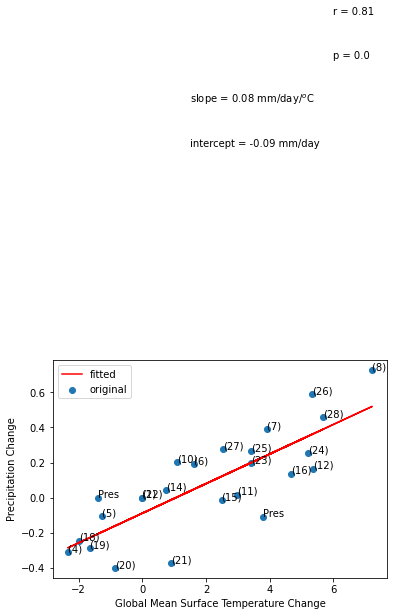

In [77]:
fig, ax = plt.subplots()
plt.scatter(x, y)
plt.plot(x, intercept_SWP_GTS + slope_SWP_GTS*x, 'r')
plt.legend(['fitted','original'])

for i, txt in enumerate(x):
     ax.annotate(RUN_NAME_withExcluded[i][0][0:4], (x[i], y[i]))
        
ax.text(6, 2.75, 'r = '+ str(round(r_value_SWP_GTS,2)), fontsize=10)
ax.text(6, 2.5, 'p = '+ str(round(p_value_SWP_GTS,3)), fontsize=10)
ax.text(1.5, 2.25, 'slope = '+ str(round(slope_SWP_GTS,2))+' mm/day/$^{o}$C', fontsize=10)
ax.text(1.5, 2, 'intercept = '+ str(round(intercept_SWP_GTS,2))+' mm/day', fontsize=10)

ax.set_xlabel('Global Mean Surface Temperature Change')
ax.set_ylabel('Precipitation Change')

plt.savefig('LossPlateauPrecip_vs_GST.pdf', format='pdf')
plt.savefig('LossPlateauPrecip_vs_GST.png', format='png') 

Text(0.5, 1.0, 'Loss Plateau Precipitation Synthetic Time Series based on Global Mean Temperature Estimate')

<Figure size 400x400 with 0 Axes>

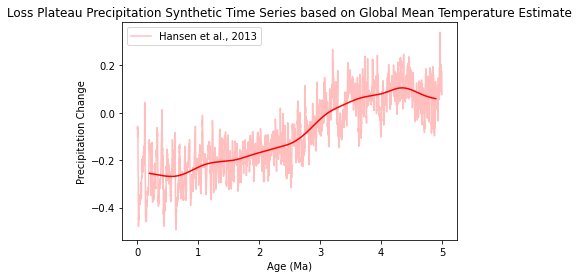

In [78]:
fig = plt.figure(figsize=(4, 4), dpi=100) #figsize(weight,height)
fig,ax=plt.subplots()
line1 = plt.plot(THansenMethodGST_5Ma[:,0],delta_HansenGST[:]*slope_SWP_GTS+intercept_SWP_GTS, color='red', alpha=0.25, label='Hansen et al., 2013')
line2 = plt.plot(FedorovEtAl2015_Ma,delta_HansenGST_Fedtime_smoothed*slope_SWP_GTS+intercept_SWP_GTS, color='red')
               
ax.legend()

ax.set_xlabel('Age (Ma)')
ax.set_ylabel('Precipitation Change')
ax.set_title('Loss Plateau Precipitation Synthetic Time Series based on Global Mean Temperature Estimate')

## Final figure for Loss Plateau Precipitation based where the relationships are significant at the 95% confidence interval

<Figure size 400x400 with 0 Axes>

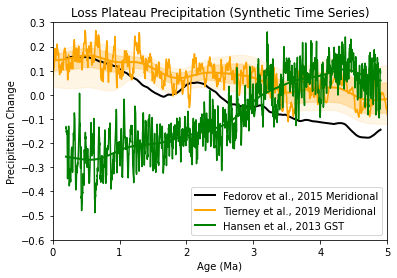

In [79]:
fig = plt.figure(figsize=(4, 4), dpi=100) #figsize(weight,height)
fig,ax=plt.subplots()
line1 = plt.plot(FedorovEtAl2015_Ma,-FedorovEtAl2015['gradient_mer_change'][0,:]*slope_SWP_Merid+intercept_SWP_Merid, color='black', label='Fedorov et al., 2015 Meridional',linewidth=2)

line2 = ax.fill_between(Tierney2019_time,np.amin(Tierney2019_gradient_mer_change_smoothed[:,:], axis=1)*slope_SWP_Merid+intercept_SWP_Merid,
                np.amax(Tierney2019_gradient_mer_change_smoothed[:,:], axis=1)*slope_SWP_Merid+intercept_SWP_Merid, color='orange', alpha=0.1)
line3 = ax.fill_between(Tierney2019_time,np.percentile(Tierney2019_gradient_mer_change_smoothed[:,:], 2.5, axis=1)*slope_SWP_Merid+intercept_SWP_Merid,
                np.percentile(Tierney2019_gradient_mer_change_smoothed[:,:], 97.5, axis=1)*slope_SWP_Merid+intercept_SWP_Merid, color='orange', alpha=0.25)
line4 = plt.plot(Tierney2019_time,Tierney2019_gradient_mer_change_em_smoothed*slope_SWP_Merid+intercept_SWP_Merid, color='orange', label='Tierney et al., 2019 Meridional',linewidth=2)
line44 = plt.plot(Tierney2019_time,Tierney2019_gradient_mer_change_em*slope_SWP_Merid+intercept_SWP_Merid, color='orange')

#line5 = plt.plot(FedorovEtAl2015_Ma,-FedorovEtAl2015['gradient_zon_change'][0,:]*slope_SWP_Zonal+intercept_SWP_Zonal, color='blue', label='Fedorov et al., 2015 Zonal',linewidth=2)

#line6 = ax.fill_between(Tierney2019_time,np.amin(Tierney2019_gradient_zon_change_smoothed[:,:], axis=1)*slope_SWP_Zonal+intercept_SWP_Zonal,
#                np.amax(Tierney2019_gradient_zon_change_smoothed[:,:], axis=1)*slope_SWP_Zonal+intercept_SWP_Zonal, color='red', alpha=0.1)
#line7 = ax.fill_between(Tierney2019_time,np.percentile(Tierney2019_gradient_zon_change_smoothed[:,:], 2.5, axis=1)*slope_SWP_Zonal+intercept_SWP_Zonal,
#                np.percentile(Tierney2019_gradient_zon_change_smoothed[:,:], 97.5, axis=1)*slope_SWP_Zonal+intercept_SWP_Zonal, color='red', alpha=0.25)
#line8 = plt.plot(Tierney2019_time,Tierney2019_gradient_zon_change_em_smoothed*slope_SWP_Zonal+intercept_SWP_Zonal, color='red', label='Tierney et al., 2019 Zonal',linewidth=2)
#line88 = plt.plot(Tierney2019_time,Tierney2019_gradient_zon_change_em*slope_SWP_Zonal+intercept_SWP_Zonal, color='red')

line9 = plt.plot(FedorovEtAl2015_Ma,delta_HansenGST_Fedtime_smoothed*slope_SWP_GTS+intercept_SWP_GTS, color='green',label='Hansen et al., 2013 GST',linewidth=2)
line99 = plt.plot(FedorovEtAl2015_Ma,delta_HansenGST_Fedtime*slope_SWP_GTS+intercept_SWP_GTS, color='green')

ax.legend()

ax.legend(loc='lower right')
plt.xlim([0, 5])
plt.ylim([-0.6, 0.3])

ax.set_xlabel('Age (Ma)')
ax.set_ylabel('Precipitation Change')
ax.set_title('Loss Plateau Precipitation (Synthetic Time Series)')

plt.savefig('LossPlateauSyntheticPrecipTimeSeries.pdf', format='pdf')
plt.savefig('LossPlateauSyntheticPrecipTimeSeries.png', format='png') 
#plt.savefig('LossPlateauSyntheticPrecipTimeSeries_v2.pdf', format='pdf')
#plt.savefig('LossPlateauSyntheticPrecipTimeSeries_v2.png', format='png') 

## Loss Plateau P-E

Exclude runs that are too warm or cool. Runs: 2, 3, 9, 13, 17, 29, 30 -> 1, 2, 8, 12, 16, 28, 29

In [80]:
RUN_NAME_withExcluded=np.concatenate((LossPlatIndicies['RUN_NAME'][:,0],LossPlatIndicies['RUN_NAME'][0,3:8],LossPlatIndicies['RUN_NAME'][0,9:12],LossPlatIndicies['RUN_NAME'][0,13:16],LossPlatIndicies['RUN_NAME'][0,17:21],LossPlatIndicies['RUN_NAME'][0,21:28],LossPlatIndicies['RUN_NAME'][0,30:]),axis=0)

### Zonal Temperature Gradient

In [81]:
#Dont Exclude runs
#x=LossPlatIndicies['delta_Pac_zonal_grad_SST'][0,:]
#y=LossPlatIndicies['delta_P_LossPlatEASM'][0,:]

# Exclude Controls
#x=np.concatenate((LossPlatIndicies['delta_Pac_zonal_grad_SST'][0,1:21],LossPlatIndicies['delta_Pac_zonal_grad_SST'][0,22:]),axis=0)
#y=np.concatenate((LossPlatIndicies['delta_P_LossPlatEASM'][0,1:21],LossPlatIndicies['delta_P_LossPlatEASM'][0,22:]),axis=0)


#Exclude runs and controls
#x=np.concatenate((LossPlatIndicies['delta_Pac_zonal_grad_SST'][0,3:8],LossPlatIndicies['delta_Pac_zonal_grad_SST'][0,9:12],LossPlatIndicies['delta_Pac_zonal_grad_SST'][0,13:16],LossPlatIndicies['delta_Pac_zonal_grad_SST'][0,17:21],LossPlatIndicies['delta_Pac_zonal_grad_SST'][0,22:28],LossPlatIndicies['delta_Pac_zonal_grad_SST'][0,30:]),axis=0)
#y=np.concatenate((LossPlatIndicies['delta_P_LossPlatEASM'][0,3:8],LossPlatIndicies['delta_P_LossPlatEASM'][0,9:12],LossPlatIndicies['delta_P_LossPlatEASM'][0,13:16],LossPlatIndicies['delta_P_LossPlatEASM'][0,17:21],LossPlatIndicies['delta_P_LossPlatEASM'][0,22:28],LossPlatIndicies['delta_P_LossPlatEASM'][0,30:]),axis=0)

#Exclude runs
x=np.concatenate((LossPlatIndicies['delta_Pac_zonal_grad_SST'][:,0],LossPlatIndicies['delta_Pac_zonal_grad_SST'][0,3:8],LossPlatIndicies['delta_Pac_zonal_grad_SST'][0,9:12],LossPlatIndicies['delta_Pac_zonal_grad_SST'][0,13:16],LossPlatIndicies['delta_Pac_zonal_grad_SST'][0,17:21],LossPlatIndicies['delta_Pac_zonal_grad_SST'][0,21:28],LossPlatIndicies['delta_Pac_zonal_grad_SST'][0,30:]),axis=0)
y=np.concatenate((LossPlatIndicies['delta_PE_LossPlatEASM'][:,0],LossPlatIndicies['delta_PE_LossPlatEASM'][0,3:8],LossPlatIndicies['delta_PE_LossPlatEASM'][0,9:12],LossPlatIndicies['delta_PE_LossPlatEASM'][0,13:16],LossPlatIndicies['delta_PE_LossPlatEASM'][0,17:21],LossPlatIndicies['delta_PE_LossPlatEASM'][0,21:28],LossPlatIndicies['delta_PE_LossPlatEASM'][0,30:]),axis=0)



In [82]:
slope_SWP_Zonal, intercept_SWP_Zonal, r_value_SWP_Zonal, p_value_SWP_Zonal, std_err_SWP_Zonal = linregress(x, y)

In [83]:
slope_SWP_Zonal,intercept_SWP_Zonal,r_value_SWP_Zonal,p_value_SWP_Zonal, std_err_SWP_Zonal

(0.12843526929692983,
 0.07139773143118727,
 0.6195762305389828,
 0.0009568359722701644,
 0.03392814800175515)

## This is comparable to Fig. 3b Zheng et al. 2022

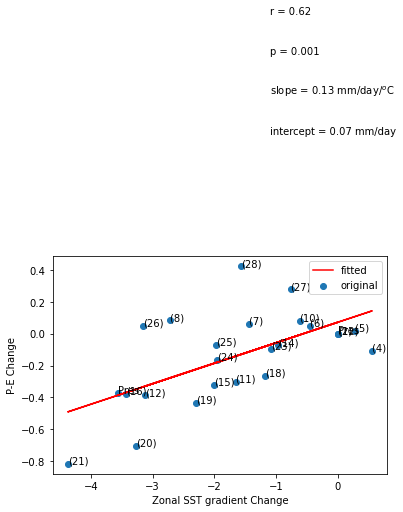

In [84]:
fig, ax = plt.subplots()
plt.scatter(x, y)
plt.plot(x, intercept_SWP_Zonal + slope_SWP_Zonal*x, 'r')
plt.legend(['fitted','original'])

for i, txt in enumerate(x):
     ax.annotate(RUN_NAME_withExcluded[i][0][0:4], (x[i], y[i]))
        
ax.text(-1.1, 2, 'r = '+ str(round(r_value_SWP_Zonal,2)), fontsize=10)
ax.text(-1.1, 1.75, 'p = '+ str(round(p_value_SWP_Zonal,3)), fontsize=10)
ax.text(-1.1, 1.5, 'slope = '+ str(round(slope_SWP_Zonal,2))+' mm/day/$^{o}$C', fontsize=10)
ax.text(-1.1, 1.25, 'intercept = '+ str(round(intercept_SWP_Zonal,2))+' mm/day', fontsize=10)

ax.set_xlabel('Zonal SST gradient Change')
ax.set_ylabel('P-E Change')

plt.savefig('LossPlateauPmE_vs_Zonal.pdf', format='pdf')
plt.savefig('LossPlateauPmE_vs_Zonal.png', format='png') 

Text(0.5, 1.0, 'Loss Plateau P-E Synthetic Time Series based on Zonal SST gradient')

<Figure size 400x400 with 0 Axes>

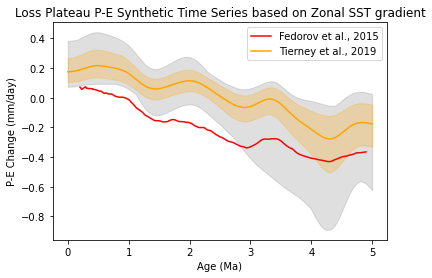

In [85]:
fig = plt.figure(figsize=(4, 4), dpi=100) #figsize(weight,height)
fig,ax=plt.subplots()
line1 = plt.plot(FedorovEtAl2015_Ma,-FedorovEtAl2015['gradient_zon_change'][0,:]*slope_SWP_Zonal+intercept_SWP_Zonal, color='red', label='Fedorov et al., 2015')
line2 = ax.fill_between(Tierney2019_time,np.amin(Tierney2019_gradient_zon_change_smoothed[:,:], axis=1)*slope_SWP_Zonal+intercept_SWP_Zonal,
                np.amax(Tierney2019_gradient_zon_change_smoothed[:,:], axis=1)*slope_SWP_Zonal+intercept_SWP_Zonal, color='grey', alpha=0.25)
line3 = ax.fill_between(Tierney2019_time,np.percentile(Tierney2019_gradient_zon_change_smoothed[:,:], 2.5, axis=1)*slope_SWP_Zonal+intercept_SWP_Zonal,
                np.percentile(Tierney2019_gradient_zon_change_smoothed[:,:], 97.5, axis=1)*slope_SWP_Zonal+intercept_SWP_Zonal, color='orange', alpha=0.25)
line4 = plt.plot(Tierney2019_time,Tierney2019_gradient_zon_change_em_smoothed*slope_SWP_Zonal+intercept_SWP_Zonal, color='orange', label='Tierney et al., 2019')
ax.legend()

ax.set_xlabel('Age (Ma)')
ax.set_ylabel('P-E Change (mm/day)')
ax.set_title('Loss Plateau P-E Synthetic Time Series based on Zonal SST gradient')

### Meridional Temperature Gradient

In [86]:
#Dont Exclude runs
#x=LossPlatIndicies['delta_Pac_meridional_grad_SST'][0,:]
#y=LossPlatIndicies['delta_P_LossPlatEASM'][0,:]

# Exclude Controls
#x=np.concatenate((LossPlatIndicies['delta_Pac_meridional_grad_SST'][0,1:21],LossPlatIndicies['delta_Pac_meridional_grad_SST'][0,22:]),axis=0)
#y=np.concatenate((LossPlatIndicies['delta_P_LossPlatEASM'][0,1:21],LossPlatIndicies['delta_P_LossPlatEASM'][0,22:]),axis=0)


#Exclude runs and controls
#x=np.concatenate((LossPlatIndicies['delta_Pac_meridional_grad_SST'][0,3:8],LossPlatIndicies['delta_Pac_meridional_grad_SST'][0,9:12],LossPlatIndicies['delta_Pac_meridional_grad_SST'][0,13:16],LossPlatIndicies['delta_Pac_meridional_grad_SST'][0,17:21],LossPlatIndicies['delta_Pac_meridional_grad_SST'][0,22:28],LossPlatIndicies['delta_Pac_meridional_grad_SST'][0,30:]),axis=0)
#y=np.concatenate((LossPlatIndicies['delta_P_LossPlatEASM'][0,3:8],LossPlatIndicies['delta_P_LossPlatEASM'][0,9:12],LossPlatIndicies['delta_P_LossPlatEASM'][0,13:16],LossPlatIndicies['delta_P_LossPlatEASM'][0,17:21],LossPlatIndicies['delta_P_LossPlatEASM'][0,22:28],LossPlatIndicies['delta_P_LossPlatEASM'][0,30:]),axis=0)

#Exclude runs
#x=np.concatenate((LossPlatIndicies['delta_Pac_meridional_grad_SST'][:,0],LossPlatIndicies['delta_Pac_meridional_grad_SST'][0,3:8],LossPlatIndicies['delta_Pac_meridional_grad_SST'][0,9:12],LossPlatIndicies['delta_Pac_meridional_grad_SST'][0,13:16],LossPlatIndicies['delta_Pac_meridional_grad_SST'][0,17:21],LossPlatIndicies['delta_Pac_meridional_grad_SST'][0,21:28],LossPlatIndicies['delta_Pac_meridional_grad_SST'][0,30:]),axis=0)
x=np.concatenate((LossPlatIndicies['delta_SST_struct'][:,0],LossPlatIndicies['delta_SST_struct'][0,3:8],LossPlatIndicies['delta_SST_struct'][0,9:12],LossPlatIndicies['delta_SST_struct'][0,13:16],LossPlatIndicies['delta_SST_struct'][0,17:21],LossPlatIndicies['delta_SST_struct'][0,21:28],LossPlatIndicies['delta_SST_struct'][0,30:]),axis=0)
#x=np.concatenate((LossPlatIndicies['delta_SST_struct_NH'][:,0],LossPlatIndicies['delta_SST_struct_NH'][0,3:8],LossPlatIndicies['delta_SST_struct_NH'][0,9:12],LossPlatIndicies['delta_SST_struct_NH'][0,13:16],LossPlatIndicies['delta_SST_struct_NH'][0,17:21],LossPlatIndicies['delta_SST_struct_NH'][0,21:28],LossPlatIndicies['delta_SST_struct_NH'][0,30:]),axis=0)
y=np.concatenate((LossPlatIndicies['delta_PE_LossPlatEASM'][:,0],LossPlatIndicies['delta_PE_LossPlatEASM'][0,3:8],LossPlatIndicies['delta_PE_LossPlatEASM'][0,9:12],LossPlatIndicies['delta_PE_LossPlatEASM'][0,13:16],LossPlatIndicies['delta_PE_LossPlatEASM'][0,17:21],LossPlatIndicies['delta_PE_LossPlatEASM'][0,21:28],LossPlatIndicies['delta_PE_LossPlatEASM'][0,30:]),axis=0)


In [87]:
#LossPlatIndicies

In [88]:
slope_SWP_Merid, intercept_SWP_Merid, r_value_SWP_Merid, p_value_SWP_Merid, std_err_SWP_Merid = linregress(x, y)

In [89]:
slope_SWP_Merid,intercept_SWP_Merid,r_value_SWP_Merid,p_value_SWP_Merid, std_err_SWP_Merid

(0.26033536153606845,
 0.07028429788763235,
 0.7675230963482239,
 7.549304689705843e-06,
 0.045336735631258084)

## This is comparable to Fig. 3a Zheng et al. 2022

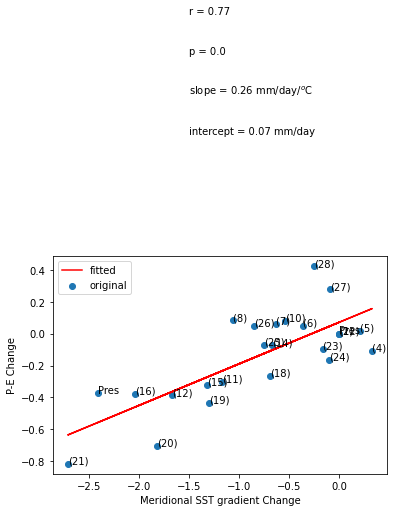

In [90]:
fig, ax = plt.subplots()
plt.scatter(x, y)
plt.plot(x, intercept_SWP_Merid + slope_SWP_Merid*x, 'r')
plt.legend(['fitted','original'])

for i, txt in enumerate(x):
     ax.annotate(RUN_NAME_withExcluded[i][0][0:4], (x[i], y[i]))
        
ax.text(-1.5, 2, 'r = '+ str(round(r_value_SWP_Merid,2)), fontsize=10)
ax.text(-1.5, 1.75, 'p = '+ str(round(p_value_SWP_Merid,3)), fontsize=10)
ax.text(-1.5, 1.5, 'slope = '+ str(round(slope_SWP_Merid,2))+' mm/day/$^{o}$C', fontsize=10)
ax.text(-1.5, 1.25, 'intercept = '+ str(round(intercept_SWP_Merid,2))+' mm/day', fontsize=10)

ax.set_xlabel('Meridional SST gradient Change')
ax.set_ylabel('P-E Change')

plt.savefig('LossPlateauPmE_vs_Meridional.pdf', format='pdf')
plt.savefig('LossPlateauPmE_vs_Meridional.png', format='png') 

Text(0.5, 1.0, 'Loss Plateau P-E Synthetic Time Series based on Meridional SST gradien')

<Figure size 400x400 with 0 Axes>

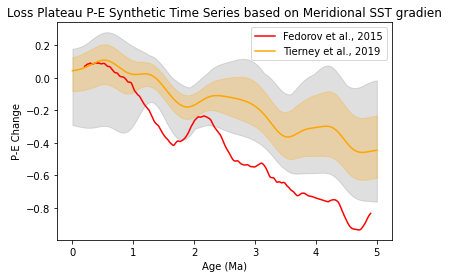

In [91]:
fig = plt.figure(figsize=(4, 4), dpi=100) #figsize(weight,height)
fig,ax=plt.subplots()
line1 = plt.plot(FedorovEtAl2015_Ma,-FedorovEtAl2015['gradient_mer_change'][0,:]*slope_SWP_Merid+intercept_SWP_Merid, color='red', label='Fedorov et al., 2015')
line2 = ax.fill_between(Tierney2019_time,np.amin(Tierney2019_gradient_mer_change_smoothed[:,:], axis=1)*slope_SWP_Merid+intercept_SWP_Merid,
                np.amax(Tierney2019_gradient_mer_change_smoothed[:,:], axis=1)*slope_SWP_Merid+intercept_SWP_Merid, color='grey', alpha=0.25)
line3 = ax.fill_between(Tierney2019_time,np.percentile(Tierney2019_gradient_mer_change_smoothed[:,:], 2.5, axis=1)*slope_SWP_Merid+intercept_SWP_Merid,
                np.percentile(Tierney2019_gradient_mer_change_smoothed[:,:], 97.5, axis=1)*slope_SWP_Merid+intercept_SWP_Merid, color='orange', alpha=0.25)
line4 = plt.plot(Tierney2019_time,Tierney2019_gradient_mer_change_em_smoothed*slope_SWP_Merid+intercept_SWP_Merid, color='orange', label='Tierney et al., 2019')
ax.legend()

ax.set_xlabel('Age (Ma)')
ax.set_ylabel('P-E Change')
ax.set_title('Loss Plateau P-E Synthetic Time Series based on Meridional SST gradien')

Text(0.5, 1.0, 'Loss Plateau P-E Synthetic Time Series')

<Figure size 400x400 with 0 Axes>

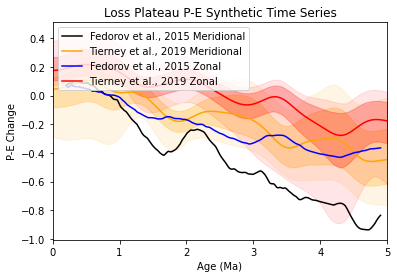

In [92]:
fig = plt.figure(figsize=(4, 4), dpi=100) #figsize(weight,height)
fig,ax=plt.subplots()
line1 = plt.plot(FedorovEtAl2015_Ma,-FedorovEtAl2015['gradient_mer_change'][0,:]*slope_SWP_Merid+intercept_SWP_Merid, color='black', label='Fedorov et al., 2015 Meridional')
line2 = ax.fill_between(Tierney2019_time,np.amin(Tierney2019_gradient_mer_change_smoothed[:,:], axis=1)*slope_SWP_Merid+intercept_SWP_Merid,
                np.amax(Tierney2019_gradient_mer_change_smoothed[:,:], axis=1)*slope_SWP_Merid+intercept_SWP_Merid, color='orange', alpha=0.1)
line3 = ax.fill_between(Tierney2019_time,np.percentile(Tierney2019_gradient_mer_change_smoothed[:,:], 2.5, axis=1)*slope_SWP_Merid+intercept_SWP_Merid,
                np.percentile(Tierney2019_gradient_mer_change_smoothed[:,:], 97.5, axis=1)*slope_SWP_Merid+intercept_SWP_Merid, color='orange', alpha=0.25)
line4 = plt.plot(Tierney2019_time,Tierney2019_gradient_mer_change_em_smoothed*slope_SWP_Merid+intercept_SWP_Merid, color='orange', label='Tierney et al., 2019 Meridional')


line5 = plt.plot(FedorovEtAl2015_Ma,-FedorovEtAl2015['gradient_zon_change'][0,:]*slope_SWP_Zonal+intercept_SWP_Zonal, color='blue', label='Fedorov et al., 2015 Zonal')
line6 = ax.fill_between(Tierney2019_time,np.amin(Tierney2019_gradient_zon_change_smoothed[:,:], axis=1)*slope_SWP_Zonal+intercept_SWP_Zonal,
                np.amax(Tierney2019_gradient_zon_change_smoothed[:,:], axis=1)*slope_SWP_Zonal+intercept_SWP_Zonal, color='red', alpha=0.1)
line7 = ax.fill_between(Tierney2019_time,np.percentile(Tierney2019_gradient_zon_change_smoothed[:,:], 2.5, axis=1)*slope_SWP_Zonal+intercept_SWP_Zonal,
                np.percentile(Tierney2019_gradient_zon_change_smoothed[:,:], 97.5, axis=1)*slope_SWP_Zonal+intercept_SWP_Zonal, color='red', alpha=0.25)
line8 = plt.plot(Tierney2019_time,Tierney2019_gradient_zon_change_em_smoothed*slope_SWP_Zonal+intercept_SWP_Zonal, color='red', label='Tierney et al., 2019 Zonal')



ax.legend(loc='upper left')
plt.xlim([0, 5])

ax.set_xlabel('Age (Ma)')
ax.set_ylabel('P-E Change')
ax.set_title('Loss Plateau P-E Synthetic Time Series')

### Global Mean Surface Temperature

In [93]:
#Dont Exclude runs
x=LossPlatIndicies['delta_GTS'][0,:]
y=LossPlatIndicies['delta_P_LossPlatEASM'][0,:]

# Exclude Controls
#x=np.concatenate((LossPlatIndicies['delta_GTS'][0,1:21],LossPlatIndicies['delta_GTS'][0,22:]),axis=0)
#y=np.concatenate((LossPlatIndicies['delta_P_LossPlatEASM'][0,1:21],LossPlatIndicies['delta_P_LossPlatEASM'][0,22:]),axis=0)


#Exclude runs and controls
#x=np.concatenate((LossPlatIndicies['delta_GTS'][0,3:8],LossPlatIndicies['delta_GTS'][0,9:12],LossPlatIndicies['delta_GTS'][0,13:16],LossPlatIndicies['delta_GTS'][0,17:21],LossPlatIndicies['delta_GTS'][0,22:28],LossPlatIndicies['delta_GTS'][0,30:]),axis=0)
#y=np.concatenate((LossPlatIndicies['delta_P_LossPlatEASM'][0,3:8],LossPlatIndicies['delta_P_LossPlatEASM'][0,9:12],LossPlatIndicies['delta_P_LossPlatEASM'][0,13:16],LossPlatIndicies['delta_P_LossPlatEASM'][0,17:21],LossPlatIndicies['delta_P_LossPlatEASM'][0,22:28],LossPlatIndicies['delta_P_LossPlatEASM'][0,30:]),axis=0)

#Exclude runs
#x=np.concatenate((LossPlatIndicies['delta_GTS'][:,0],LossPlatIndicies['delta_GTS'][0,3:8],LossPlatIndicies['delta_GTS'][0,9:12],LossPlatIndicies['delta_GTS'][0,13:16],LossPlatIndicies['delta_GTS'][0,17:21],LossPlatIndicies['delta_GTS'][0,21:28],LossPlatIndicies['delta_GTS'][0,30:]),axis=0)
#y=np.concatenate((LossPlatIndicies['delta_PE_LossPlatEASM'][:,0],LossPlatIndicies['delta_PE_LossPlatEASM'][0,3:8],LossPlatIndicies['delta_PE_LossPlatEASM'][0,9:12],LossPlatIndicies['delta_PE_LossPlatEASM'][0,13:16],LossPlatIndicies['delta_PE_LossPlatEASM'][0,17:21],LossPlatIndicies['delta_PE_LossPlatEASM'][0,21:28],LossPlatIndicies['delta_PE_LossPlatEASM'][0,30:]),axis=0)



In [94]:
slope_SWP_GTS, intercept_SWP_GTS, r_value_SWP_GTS, p_value_SWP_GTS, std_err_SWP_GTS = linregress(x, y)

In [95]:
slope_SWP_GTS,intercept_SWP_GTS,r_value_SWP_GTS,p_value_SWP_GTS, std_err_SWP_GTS

(0.08109812738034183,
 -0.08952892808808324,
 0.9032372165361126,
 1.5099529487500814e-12,
 0.0070347555716046275)

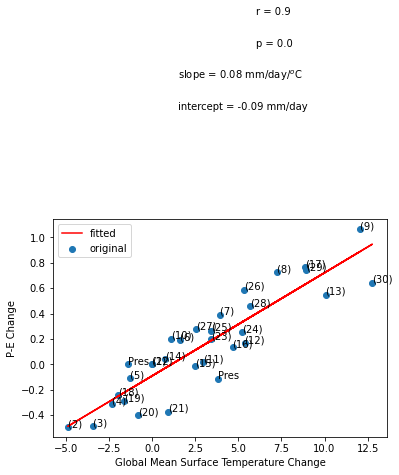

In [96]:
fig, ax = plt.subplots()
plt.scatter(x, y)
plt.plot(x, intercept_SWP_GTS + slope_SWP_GTS*x, 'r')
plt.legend(['fitted','original'])

for i, txt in enumerate(x):
     ax.annotate(LossPlatIndicies['RUN_NAME'][0][i][0][0:4], (x[i], y[i]))
        
ax.text(6, 2.75, 'r = '+ str(round(r_value_SWP_GTS,2)), fontsize=10)
ax.text(6, 2.5, 'p = '+ str(round(p_value_SWP_GTS,3)), fontsize=10)
ax.text(1.5, 2.25, 'slope = '+ str(round(slope_SWP_GTS,2))+' mm/day/$^{o}$C', fontsize=10)
ax.text(1.5, 2, 'intercept = '+ str(round(intercept_SWP_GTS,2))+' mm/day', fontsize=10)

ax.set_xlabel('Global Mean Surface Temperature Change')
ax.set_ylabel('P-E Change')

plt.savefig('LossPlateauPmE_vs_GST.pdf', format='pdf')
plt.savefig('LossPlateauPmE_vs_GST.png', format='png') 

## Figure for Loss Plateau P-E based where the relationships are significant at the 95% confidence interval

<Figure size 400x400 with 0 Axes>

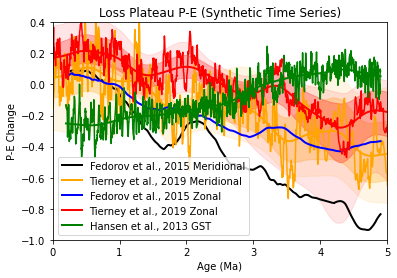

In [97]:
fig = plt.figure(figsize=(4, 4), dpi=100) #figsize(weight,height)
fig,ax=plt.subplots()
line1 = plt.plot(FedorovEtAl2015_Ma,-FedorovEtAl2015['gradient_mer_change'][0,:]*slope_SWP_Merid+intercept_SWP_Merid, color='black', label='Fedorov et al., 2015 Meridional',linewidth=2)

line2 = ax.fill_between(Tierney2019_time,np.amin(Tierney2019_gradient_mer_change_smoothed[:,:], axis=1)*slope_SWP_Merid+intercept_SWP_Merid,
                np.amax(Tierney2019_gradient_mer_change_smoothed[:,:], axis=1)*slope_SWP_Merid+intercept_SWP_Merid, color='orange', alpha=0.1)
line3 = ax.fill_between(Tierney2019_time,np.percentile(Tierney2019_gradient_mer_change_smoothed[:,:], 2.5, axis=1)*slope_SWP_Merid+intercept_SWP_Merid,
                np.percentile(Tierney2019_gradient_mer_change_smoothed[:,:], 97.5, axis=1)*slope_SWP_Merid+intercept_SWP_Merid, color='orange', alpha=0.25)
line4 = plt.plot(Tierney2019_time,Tierney2019_gradient_mer_change_em_smoothed*slope_SWP_Merid+intercept_SWP_Merid, color='orange', label='Tierney et al., 2019 Meridional',linewidth=2)
line44 = plt.plot(Tierney2019_time,Tierney2019_gradient_mer_change_em*slope_SWP_Merid+intercept_SWP_Merid, color='orange')

line5 = plt.plot(FedorovEtAl2015_Ma,-FedorovEtAl2015['gradient_zon_change'][0,:]*slope_SWP_Zonal+intercept_SWP_Zonal, color='blue', label='Fedorov et al., 2015 Zonal',linewidth=2)

line6 = ax.fill_between(Tierney2019_time,np.amin(Tierney2019_gradient_zon_change_smoothed[:,:], axis=1)*slope_SWP_Zonal+intercept_SWP_Zonal,
                np.amax(Tierney2019_gradient_zon_change_smoothed[:,:], axis=1)*slope_SWP_Zonal+intercept_SWP_Zonal, color='red', alpha=0.1)
line7 = ax.fill_between(Tierney2019_time,np.percentile(Tierney2019_gradient_zon_change_smoothed[:,:], 2.5, axis=1)*slope_SWP_Zonal+intercept_SWP_Zonal,
                np.percentile(Tierney2019_gradient_zon_change_smoothed[:,:], 97.5, axis=1)*slope_SWP_Zonal+intercept_SWP_Zonal, color='red', alpha=0.25)
line8 = plt.plot(Tierney2019_time,Tierney2019_gradient_zon_change_em_smoothed*slope_SWP_Zonal+intercept_SWP_Zonal, color='red', label='Tierney et al., 2019 Zonal',linewidth=2)
line88 = plt.plot(Tierney2019_time,Tierney2019_gradient_zon_change_em*slope_SWP_Zonal+intercept_SWP_Zonal, color='red')

line9 = plt.plot(FedorovEtAl2015_Ma,delta_HansenGST_Fedtime_smoothed*slope_SWP_GTS+intercept_SWP_GTS, color='green',label='Hansen et al., 2013 GST',linewidth=2)
line99 = plt.plot(FedorovEtAl2015_Ma,delta_HansenGST_Fedtime*slope_SWP_GTS+intercept_SWP_GTS, color='green')

ax.legend()

ax.legend(loc='lower left')
plt.xlim([0, 5])
plt.ylim([-1, 0.4])

ax.set_xlabel('Age (Ma)')
ax.set_ylabel('P-E Change')
ax.set_title('Loss Plateau P-E (Synthetic Time Series)')

plt.savefig('LossPlateauSyntheticPmETimeSeries.pdf', format='pdf')
plt.savefig('LossPlateauSyntheticPmETimeSeries.png', format='png') 
#plt.savefig('LossPlateauSyntheticPrecipTimeSeries_v2.pdf', format='pdf')
#plt.savefig('LossPlateauSyntheticPrecipTimeSeries_v2.png', format='png') 

## Final figure for Loss Plateau P-E based where the relationships are significant at the 95% confidence interval
## This is Figure 4 in Zheng et al. 2022

<Figure size 400x400 with 0 Axes>

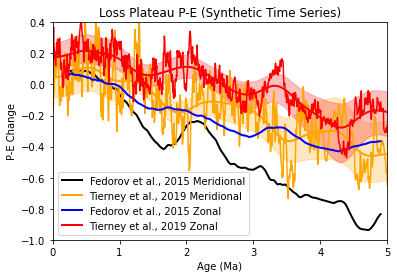

In [98]:
fig = plt.figure(figsize=(4, 4), dpi=100) #figsize(weight,height)
fig,ax=plt.subplots()
line1 = plt.plot(FedorovEtAl2015_Ma,-FedorovEtAl2015['gradient_mer_change'][0,:]*slope_SWP_Merid+intercept_SWP_Merid, color='black', label='Fedorov et al., 2015 Meridional',linewidth=2)

#line2 = ax.fill_between(Tierney2019_time,np.amin(Tierney2019_gradient_mer_change_smoothed[:,:], axis=1)*slope_SWP_Merid+intercept_SWP_Merid,
#                np.amax(Tierney2019_gradient_mer_change_smoothed[:,:], axis=1)*slope_SWP_Merid+intercept_SWP_Merid, color='orange', alpha=0.1)
line3 = ax.fill_between(Tierney2019_time,np.percentile(Tierney2019_gradient_mer_change_smoothed[:,:], 2.5, axis=1)*slope_SWP_Merid+intercept_SWP_Merid,
                np.percentile(Tierney2019_gradient_mer_change_smoothed[:,:], 97.5, axis=1)*slope_SWP_Merid+intercept_SWP_Merid, color='orange', alpha=0.25)
line4 = plt.plot(Tierney2019_time,Tierney2019_gradient_mer_change_em_smoothed*slope_SWP_Merid+intercept_SWP_Merid, color='orange', label='Tierney et al., 2019 Meridional',linewidth=2)
line44 = plt.plot(Tierney2019_time,Tierney2019_gradient_mer_change_em*slope_SWP_Merid+intercept_SWP_Merid, color='orange')

line5 = plt.plot(FedorovEtAl2015_Ma,-FedorovEtAl2015['gradient_zon_change'][0,:]*slope_SWP_Zonal+intercept_SWP_Zonal, color='blue', label='Fedorov et al., 2015 Zonal',linewidth=2)

#line6 = ax.fill_between(Tierney2019_time,np.amin(Tierney2019_gradient_zon_change_smoothed[:,:], axis=1)*slope_SWP_Zonal+intercept_SWP_Zonal,
#                np.amax(Tierney2019_gradient_zon_change_smoothed[:,:], axis=1)*slope_SWP_Zonal+intercept_SWP_Zonal, color='red', alpha=0.1)
line7 = ax.fill_between(Tierney2019_time,np.percentile(Tierney2019_gradient_zon_change_smoothed[:,:], 2.5, axis=1)*slope_SWP_Zonal+intercept_SWP_Zonal,
                np.percentile(Tierney2019_gradient_zon_change_smoothed[:,:], 97.5, axis=1)*slope_SWP_Zonal+intercept_SWP_Zonal, color='red', alpha=0.25)
line8 = plt.plot(Tierney2019_time,Tierney2019_gradient_zon_change_em_smoothed*slope_SWP_Zonal+intercept_SWP_Zonal, color='red', label='Tierney et al., 2019 Zonal',linewidth=2)
line88 = plt.plot(Tierney2019_time,Tierney2019_gradient_zon_change_em*slope_SWP_Zonal+intercept_SWP_Zonal, color='red')

#line9 = plt.plot(FedorovEtAl2015_Ma,delta_HansenGST_Fedtime_smoothed*slope_SWP_GTS+intercept_SWP_GTS, color='green',label='Hansen et al., 2013 GST',linewidth=2)
#line99 = plt.plot(FedorovEtAl2015_Ma,delta_HansenGST_Fedtime*slope_SWP_GTS+intercept_SWP_GTS, color='green')

ax.legend()

ax.legend(loc='lower left')
plt.xlim([0, 5])
plt.ylim([-1, 0.4])

ax.set_xlabel('Age (Ma)')
ax.set_ylabel('P-E Change')
ax.set_title('Loss Plateau P-E (Synthetic Time Series)')

plt.savefig('LossPlateauSyntheticPmETimeSeries_v2.pdf', format='pdf')
plt.savefig('LossPlateauSyntheticPmETimeSeries_v2.png', format='png') 
#plt.savefig('LossPlateauSyntheticPrecipTimeSeries_v2.pdf', format='pdf')
#plt.savefig('LossPlateauSyntheticPrecipTimeSeries_v2.png', format='png') 